<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Interpolación de Lagrange:

Que vamos a hacer:



1.   Calculamos a mano un polinomio de Lagrange
2.   Vamos a Python y usamos las distintas funciones para interpolar
3.   Nos mandamos a implementar nuestra propia función de python para interpolar



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

Dados un conjunto de datos $\{(x_i, y_i)\} $usando la función de la libreria: *scipy.interpolate* lagrange podemos hallar el polinomio que los interpola. Por ejemplo:

In [3]:
xs = np.array([0,1,3,5])
ys = np.array([1,2,3,4])

print(lagrange(xs, ys))
P = lagrange(xs, ys)

         3       2
0.03333 x - 0.3 x + 1.267 x + 1


In [4]:
type(P)

numpy.poly1d

La funciøn *my_lagrange* es una implementación artesanal que nos da para cada x el polinomio interpolador de los datos (xs, ys). 
No es necesario entender como está implementada y se puede usar directamente la función *lagrange*  que nos devuelve un objeto polinomio de numpy.

In [5]:
def my_lagrange(xs, ys,x):
  '''
  devuelve el polinomio de lagrange de grado n =len(xs)-1 que interpola los (xs,ys)
  '''

  n = len(xs) - 1
  L = []
  for j in range(n+1): # j=0,1,2,...n
    
    L.append(ys[j]*np.prod(x - np.hstack((xs[0:j], xs[j+1:])) )/np.prod(xs[j]- np.hstack((xs[0:j], xs[j+1:]))))

  p = np.sum(L)
  return p


  


In [6]:

print("p(0) = ", my_lagrange(xs, ys, 0))
print("p(1) = ", my_lagrange(xs, ys, 1))


p(0) =  1.0
p(1) =  2.0


In [7]:
print("usando la funcion lagrange: ")
print("P(0) = ", P(0))
print("P(1) = ", P(1))


usando la funcion lagrange: 
P(0) =  1.0
P(1) =  2.0


## Vamos con el ejemplo de la vez pasada para aproximar el valor de $\sqrt[3]{0.9}$ usando un polinomio aproximante para la función $f(x)=\sqrt[3]{1+x}$.

Para esto hallamos el pol que interpola a $f$ en 4 puntos equiespaciados del intervalo $[-1/2, 1]$ 

In [10]:
func = lambda x: (1+x)**(1/3)  # esta es una forma corta de definir una funcion

xs = np.linspace(-1/2, 1, 4)   # con linspace armamos el conjunto de puntos equiespaciados del [-1/2,1]
ys = func(xs)

print(xs)
print(ys)

[-0.5  0.   0.5  1. ]
[0.79370053 1.         1.14471424 1.25992105]


In [12]:
P = lagrange(xs, ys) # es el polinomio que calcula python

print(P)


         3          2
0.04277 x - 0.1232 x + 0.3403 x + 1


In [14]:
print("func(-0.1) = (0.9)^(1/3) = ", func(-0.1))
print("el pol de Lagrange de orden 3 usando my_lagrange: p_3(-0.1) = ", my_lagrange(xs,ys, -0.1))
print("usando la funcion lagrange de scipy.interpolate: ", P(-0.1))

func(-0.1) = (0.9)^(1/3) =  0.9654893846056297
el pol de Lagrange de orden 3 usando my_lagrange: p_3(-0.1) =  0.9646934131938504
usando la funcion lagrange de scipy.interpolate:  0.9646934131938503


In [15]:
print(ys)
print(P(xs))

[0.79370053 1.         1.14471424 1.25992105]
[0.79370053 1.         1.14471424 1.25992105]


## Función polyfit de numpy:

otra forma: usamos la función polyfit de numpy que nos devuelve un array con los coeficientes de un polinomio de grado indicado y despues con la función polyval de numpy evaluamos este polinomio en un punto o puntos deseados:

In [16]:
# con np.polyfit:
coefs_P_fit = np.polyfit(xs, ys, 3)   # esta función solo nos da los coeficientes del poli interpolador


In [17]:
# si queremos evaluar dicho polinomio en algun valor x usamos la función np.polyval:
print(np.polyval(coefs_P_fit, xs))  # nos devuelve la lista de resultados 

[0.79370053 1.         1.14471424 1.25992105]


Si queremos obtener un objeto polinomio podemos usar la función *np.poly1d* aplicada a P_fit

In [19]:
P_fit = np.poly1d(coefs_P_fit)

print("notar que la expresion de P_fit coincide con la de P calculada arriba: \n")
print(P_fit)
print(P)

notar que la expresion de P_fit coincide con la de P calculada arriba: 

         3          2
0.04277 x - 0.1232 x + 0.3403 x + 1
         3          2
0.04277 x - 0.1232 x + 0.3403 x + 1


### Estimación numérica del error de interpolación:

Podemos calcular numéricamente cuanto dista como mucho la función del polinomio en el intervalo, es decir:

$$
\max_{x\in[-0.5, 1]}|f(x) - p_n(x)|
$$

Próxima clase veremos cotas para este error.

In [20]:
grilla_x = np.linspace(-1/2,1, 100)
error = np.abs(func(grilla_x) - P(grilla_x))

print("el error es como mucho: ", np.max(error))

el error es como mucho:  0.00229053303804716


## comparemos los gráficos del polinomio de Taylor, el de Lagrange y el de f

usamos las funciones que implementamos la clase pasada:

In [ ]:
def der_k(k, x_0):
    """
    Calcula la la der k-esima de f(x) = (1+x)^{1/3}
    """

    factor = 1
    for i in range(1, k+1):
      factor = factor*(1/3 - (i-1))

    f_k = factor*(1+x_0)**(1/3 - k)

    return f_k

def Taylor_n_f(n, x, x_0):
  """
  Calcula el poli de taylor de orden n de f(x)=(1+x)^{1/3}
  """

  P = (1+ x_0)**(1/3) # f(x_0)=(1+x_0)**1/3
  for k in range(1, n+1):
    P = P + der_k(k, x_0)/np.math.factorial(k)*(x-x_0)**k

  return P



In [ ]:
Taylor_n_f(3, xs, x_0 =0)

array([0.79783951, 1.        , 1.14660494, 1.28395062])

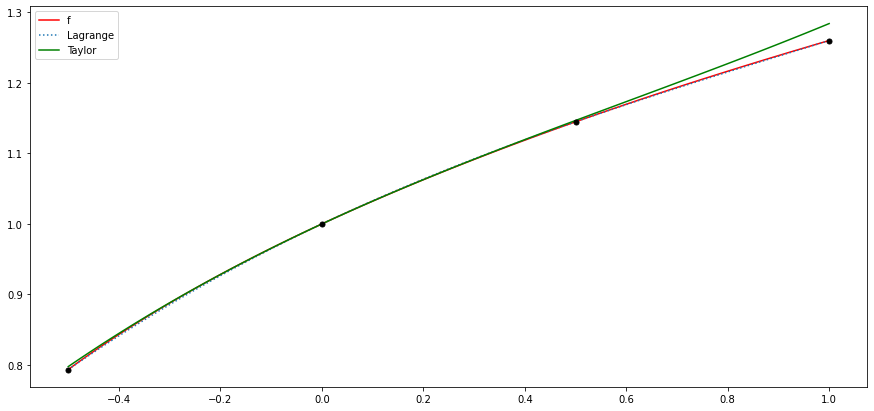

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(grilla_x, func(grilla_x), label = "f", color = "r")
plt.plot(grilla_x, P(grilla_x), label = "Lagrange", linestyle = "dotted", ms = 10)
plt.plot(grilla_x, Taylor_n_f(3,grilla_x, x_0 =0), label = "Taylor", color = "g")
plt.plot(xs, ys, '.',color = "black", ms = 10)
plt.legend()
plt.show()

## Hagamos el ejemplo del $\cos(x)$

In [ ]:
from scipy.special import factorial

P_taylor = lambda x: np.cos(1) - np.sin(1)*(x-1) - (np.cos(1)/2) * (x-1)**2 + (np.sin(1)/factorial(3))*(x-1)**3


xs = np.linspace(0, np.pi/2, 4) # elegimos 4 puntos equiespaciados en [0, pi/2]
ys = np.cos(xs)

P_L = lagrange(xs, ys)  # el pol de Lagrange que calcula python



print("el polinomio de Lagrange es: \n", P_L)


el polinomio de Lagrange es: 
         3          2
0.1139 x - 0.6021 x + 0.02816 x + 1


In [ ]:
print(ys)
print(P_L(xs))

[1.00000000e+00 8.66025404e-01 5.00000000e-01 6.12323400e-17]
[ 1.00000000e+00  8.66025404e-01  5.00000000e-01 -1.55431223e-15]


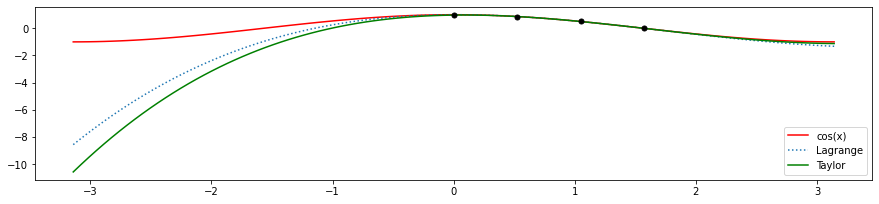

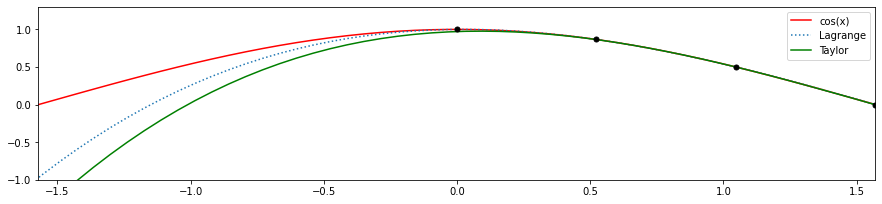

In [ ]:
grilla_x = np.linspace(-np.pi, np.pi, 100)

plt.figure(figsize = (15,7))

plt.subplot(2,1,1)
plt.plot(grilla_x, np.cos(grilla_x), label = "cos(x)", color = "r")
plt.plot(grilla_x, P_L(grilla_x), label = "Lagrange", linestyle = "dotted", ms = 10)
plt.plot(grilla_x, P_taylor(grilla_x), label = "Taylor", color = "g")
plt.plot(xs, ys, '.', color = "black", ms = 10)
plt.legend()
plt.show()

plt.figure(figsize = (15,7))
plt.subplot(2,1,2)
plt.plot(grilla_x, np.cos(grilla_x), label = "cos(x)", color = "r")
plt.plot(grilla_x, P_L(grilla_x), label = "Lagrange", linestyle = "dotted", ms = 10)
plt.plot(grilla_x, P_taylor(grilla_x), label = "Taylor", color = "g")
plt.plot(xs, ys, '.', color = "black", ms = 10)
plt.xlim(-np.pi/2, np.pi/2)
plt.ylim(-1,1.3)
plt.legend()
plt.show()


## Para esta misma función calculemos  polinomios interpoladores de distintos grados y comparemos los graficos:

 El de grado 4: tomo como puntos xs = np.linspace(0, np.pi/2, 5) es decir elijo 5 puntos equiespaciados

In [ ]:
xs1 = np.linspace(0, np.pi/2, 5)
PL_4 = lagrange(xs1, np.cos(xs1))

El de grado 5:

In [ ]:
xs2 = np.linspace(0, np.pi/2, 6) # elijo 6 puntos equiespaciados
PL_5 = lagrange(xs2, np.cos(xs2))

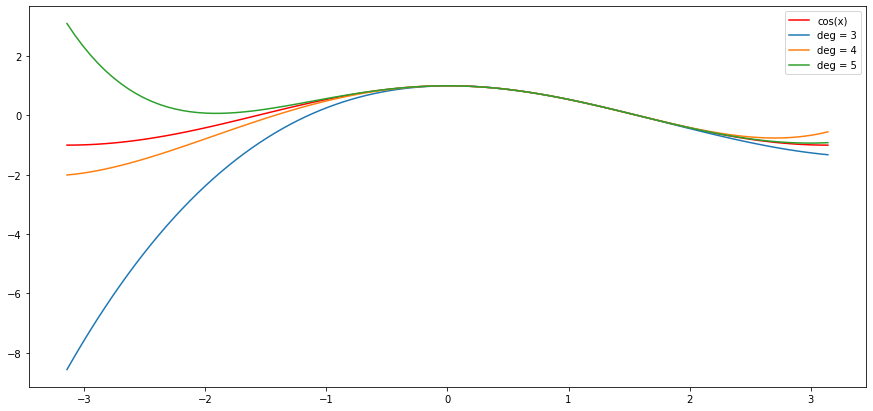

In [ ]:
grilla_x = np.linspace(-np.pi, np.pi, 100)

plt.figure(figsize = (15,7))
plt.plot(grilla_x, np.cos(grilla_x), label = "cos(x)", color = "r")
plt.plot(grilla_x, P_L(grilla_x), label = "deg = 3")
plt.plot(grilla_x, PL_4(grilla_x), label = "deg = 4")
plt.plot(grilla_x, PL_5(grilla_x), label = "deg = 5")
plt.legend()
plt.show()

### Desafío: usando un for definir una función que dado un numero $n$ y un intervalo, grafique todos los polinomios interpoladores  de  grados $1, 2,\dots,n$ en puntos equiespaciados del intervalo 

## Ejercicio:

Para $f(x)=\frac{1}{1+25x^2}$:

1. Calcular (a mano) el polinomio interpolador de grado 3 en puntos equiespaciados del intervalo $[-1,1]$

2. Usar la funcion *lagrange* de scipy.interpolate para hallar polinomios interpolantes de grados $n=5, 10$ también en puntos equiespaciados del $[-1,1]$.

3. Graficar estos polinomios y la función $f$: usar una grilla del $[-2,2]$ con 100 puntos (usar la función np.linspace). Además incluir en este gráfico los puntos de interpolación. Hacerlo en tre gráficos separados 

4. Calcular con python $$\max_{x\in[-1,1]}|f(x)-p_n(x)|$$ para $n=3, 5, 10$.